In [ ]:
import pandas as pd

### Data Collection

In [ ]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [ ]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

### Data analysis

In [ ]:
import matplotlib.pyplot as plt

In [23]:
df_train.sample(10)

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1433,3,1,8.0,1,2000.0,two,451,0,0,0,0,0,0,0,5,2008.0,186500
300,2,2,6.0,0,1956.0,two,420,0,0,0,0,0,0,0,6,2009.0,90000
809,3,1,6.0,1,1976.0,two,572,100,110,0,0,0,0,0,6,2007.0,129900
864,3,1,5.0,0,1996.0,two,672,0,0,0,0,0,0,0,2,2008.0,145000
622,3,1,5.0,0,1962.0,two,440,0,0,0,0,385,0,0,2,2010.0,160000
93,3,1,6.0,0,1964.0,two,520,176,0,0,0,0,0,0,6,2008.0,168500
704,3,1,6.0,0,2009.0,two,552,135,112,0,0,0,0,0,9,2009.0,229456
378,3,1,6.0,0,-1.0,zero,0,0,0,286,0,0,0,0,5,2007.0,79000
587,3,1,8.0,1,1998.0,two,462,0,28,0,0,0,0,0,6,2006.0,176500


In [ ]:
print("Shape:")
df_train.shape

Shape:


(1168, 17)

In [ ]:
print("Summary:")
df_train.info()

Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usa

In [ ]:
df_train[df_train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


In [30]:
print("\nSummary Statistics:")
print(f"Number different values per column\n{df_train.nunique()}")
df_train.describe()


Summary Statistics:
Number different values per column
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       98
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


In [ ]:
print("\nDuplicate rows:")
df_train[df_train.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())


Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000



Histograms of numerical features:


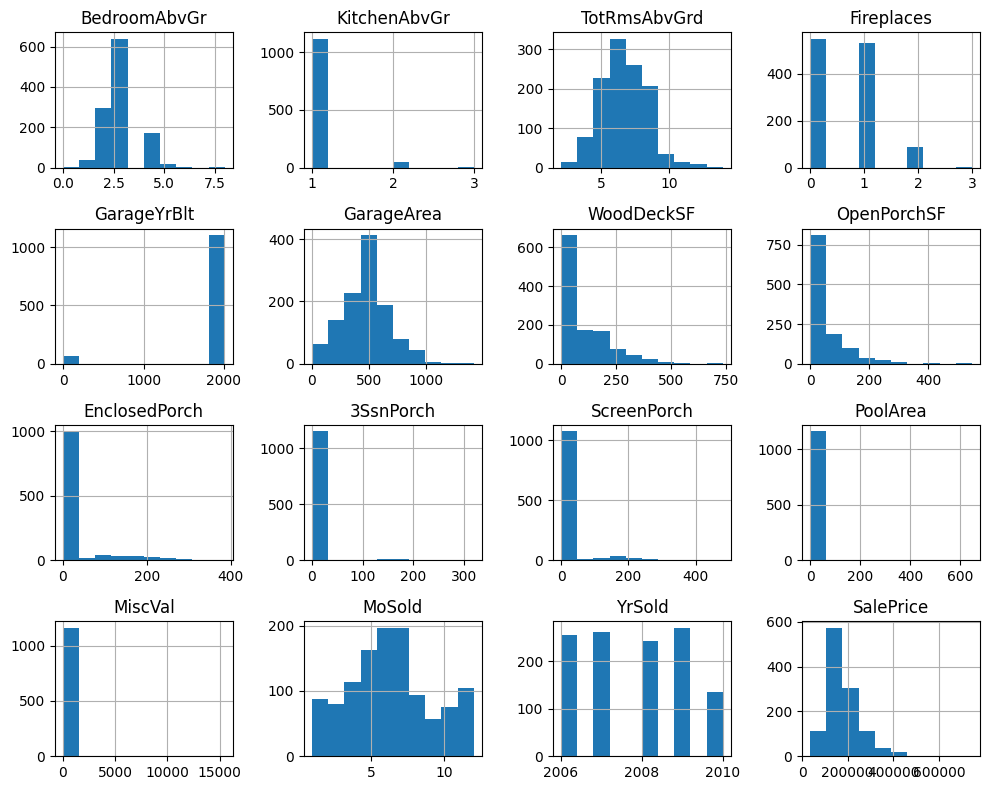

In [ ]:
print("\nHistograms of numerical features:")
df_train.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()